In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pd.set_option('display.max_columns', None)

In [3]:
df = pd.read_csv('gurgaon_properties_cleaned_v2_1.csv').drop_duplicates()

In [74]:
df

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,flat,gls avenue 51,sector 92,0.45,6000.0,750.0,Carpet area: 750 (69.68 sq.m.),3,3,1,10.0,North-East,Relatively New,NaN,NaN,750.0,0,0,0,0,0,0,0
1,flat,godrej,sector 79,2.01,8495.0,2366.0,Super Built up area 2366(219.81 sq.m.),3,4,3+,6.0,East,Relatively New,2366.0,NaN,NaN,0,1,0,0,0,0,158
2,flat,pioneer urban presidia,sector 62,7.15,16486.0,4337.0,Super Built up area 4337(402.92 sq.m.),4,5,3+,7.0,East,Relatively New,4337.0,NaN,NaN,1,1,1,0,0,1,158
3,flat,godrej aria,sector 79,1.10,7772.0,1415.0,Super Built up area 1351(125.51 sq.m.),2,2,3+,4.0,North-East,New Property,1351.0,NaN,NaN,0,0,0,0,0,1,49
4,flat,emaar digihomes,sector 62,2.15,14257.0,1508.0,Carpet area: 1508 (140.1 sq.m.),2,2,3,31.0,NaN,Under Construction,NaN,NaN,1508.0,0,0,0,0,0,0,101
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3798,flat,godrej aria,sector 79,1.70,7426.0,2289.0,Super Built up area 2289(212.66 sq.m.)Carpet a...,3,4,3+,6.0,East,New Property,2289.0,NaN,1121.0,0,1,0,0,0,0,81
3799,flat,ats triumph,sector 104,4.45,6846.0,6500.0,Carpet area: 6500 (603.87 sq.m.),4,5,3+,27.0,North,Relatively New,NaN,NaN,6500.0,0,0,0,0,0,0,110
3800,house,independent,sector 56,8.00,9654.0,8287.0,Plot area 362(33.63 sq.m.)Built Up area: 8286 ...,10,10,3+,4.0,NaN,Relatively New,NaN,8286.0,NaN,1,1,0,1,0,2,107
3801,flat,silverglades the melia,sohna road,1.01,7000.0,1443.0,Super Built up area 1450(134.71 sq.m.)Carpet a...,2,2,3,12.0,NaN,Under Construction,1450.0,NaN,950.0,1,0,0,0,0,0,80


In [5]:
df.shape

(3677, 23)

In [6]:
df.columns

Index(['property_type', 'society', 'sector', 'price', 'price_per_sqft', 'area',
       'areaWithType', 'bedRoom', 'bathroom', 'balcony', 'floorNum', 'facing',
       'agePossession', 'super_built_up_area', 'built_up_area', 'carpet_area',
       'study room', 'servant room', 'store room', 'pooja room', 'others',
       'furnishing_type', 'luxury_score'],
      dtype='object')

C:\Users\vivek matele\AppData\Local\Temp\ipykernel_7780\2797181776.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['price'])
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='price', ylabel='Density'>

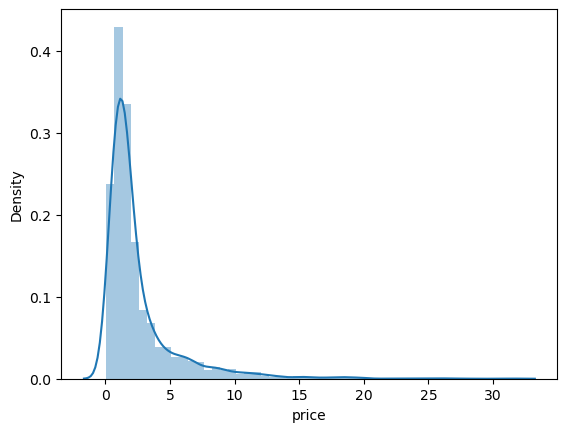

In [7]:
# outliers on the basis of price column
sns.distplot(df['price'])

<Axes: xlabel='price'>

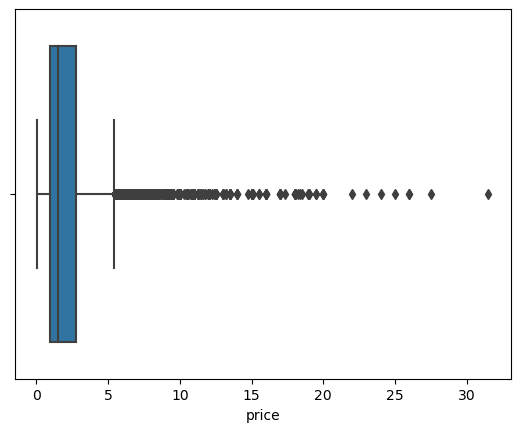

In [8]:
sns.boxplot(x=df['price'])

In [9]:
# Calculate the IQR for the 'price' column
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1

# Define bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = df[(df['price'] < lower_bound) | (df['price'] > upper_bound)]

# Displaying the number of outliers and some statistics
num_outliers = outliers.shape[0]
outliers_price_stats = outliers['price'].describe()

num_outliers, outliers_price_stats

(425,
 count    425.000000
 mean       9.235624
 std        4.065259
 min        5.460000
 25%        6.460000
 50%        8.000000
 75%       10.750000
 max       31.500000
 Name: price, dtype: float64)

In [10]:
outliers.sort_values('price',ascending=False).head(20)

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
1356,house,arjun marg/ sector- 26 phase- 1/ golf course road,sector 26,31.50,35000.0,9000.0,Plot area 1000(836.13 sq.m.),7,9,3+,3.0,North-East,Moderately Old,NaN,9000.0,NaN,1,1,1,1,0,2,74
2997,house,independent,sector 43,27.50,24366.0,11286.0,Plot area 1254(1048.5 sq.m.),6,7,3+,3.0,North-East,Relatively New,NaN,11286.0,NaN,1,1,0,1,1,1,42
3672,house,independent,sector 26,26.00,82540.0,3150.0,Plot area 402(336.12 sq.m.)Built Up area: 400 ...,16,16,3+,4.0,North-West,New Property,NaN,400.0,350.0,1,1,1,1,0,2,72
1124,house,dlf city plots,sector 26,26.00,57206.0,4545.0,Plot area 505(422.24 sq.m.),6,7,3+,2.0,North-East,New Property,NaN,4545.0,NaN,1,1,0,1,1,1,138
653,house,suncity township,sector 54,25.00,31111.0,8036.0,Plot area 1000(836.13 sq.m.),4,4,3+,2.0,North,Moderately Old,NaN,1000.0,NaN,1,1,1,1,0,0,0
2749,house,emaar the palm springs,sector 54,24.00,600000.0,400.0,Plot area 400(37.16 sq.m.),5,5,2,1.0,North-East,Old Property,NaN,400.0,NaN,1,1,0,1,0,1,122
3185,house,independent,sector 26,23.00,25556.0,9000.0,Plot area 1000(836.13 sq.m.),4,4,3+,2.0,South-West,Relatively New,NaN,9000.0,NaN,1,1,1,1,0,1,145
1646,house,vipul tatvam villa,sector 48,22.00,26667.0,8250.0,Plot area 1000(836.13 sq.m.),5,6,3,3.0,NaN,Moderately Old,NaN,1000.0,NaN,0,1,0,0,0,0,54
3248,house,dlf city plots,sector 26,20.00,44265.0,4518.0,Plot area 502(419.74 sq.m.),16,20,3+,4.0,North-East,New Property,NaN,4518.0,NaN,1,1,1,1,0,1,153
10,house,independent,sector 26,20.00,44444.0,4500.0,Plot area 500(418.06 sq.m.),5,7,3+,3.0,West,Relatively New,NaN,4500.0,NaN,0,1,0,1,0,2,97


In [11]:
# on the basis of price col we can say that there are some genuine outliers but there are some data erros as well

### Price_per_sqft

C:\Users\vivek matele\AppData\Local\Temp\ipykernel_7780\2186227091.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['price_per_sqft'])
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='price_per_sqft', ylabel='Density'>

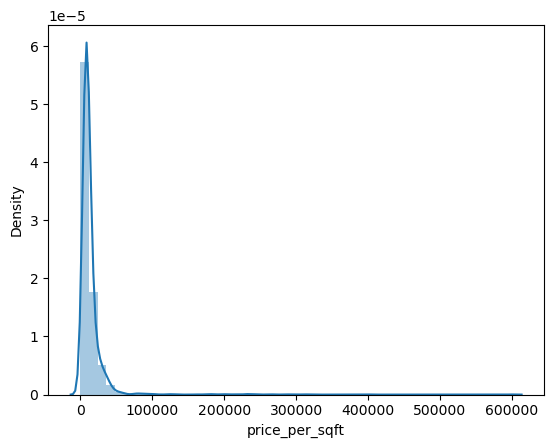

In [12]:
sns.distplot(df['price_per_sqft'])

<Axes: xlabel='price_per_sqft'>

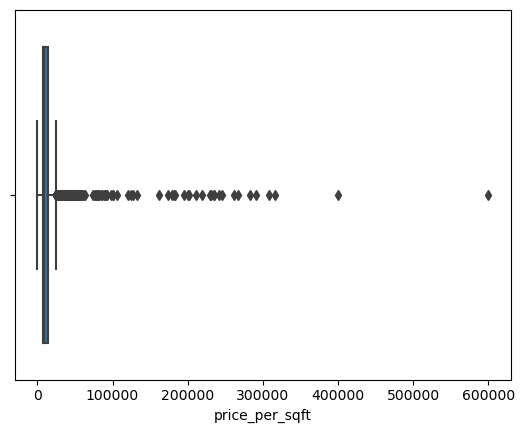

In [13]:
sns.boxplot(x=df['price_per_sqft'])

In [14]:
# Calculate the IQR for the 'price' column
Q1 = df['price_per_sqft'].quantile(0.25)
Q3 = df['price_per_sqft'].quantile(0.75)
IQR = Q3 - Q1

# Define bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers_sqft = df[(df['price_per_sqft'] < lower_bound) | (df['price_per_sqft'] > upper_bound)]

# Displaying the number of outliers and some statistics
num_outliers = outliers_sqft.shape[0]
outliers_sqft_stats = outliers_sqft['price_per_sqft'].describe()

num_outliers, outliers_sqft_stats

(354,
 count       354.000000
 mean      52592.612994
 std       61150.458507
 min       24489.000000
 25%       28208.250000
 50%       33368.500000
 75%       41982.250000
 max      600000.000000
 Name: price_per_sqft, dtype: float64)

In [15]:
outliers_sqft['area'] = outliers_sqft['area'].apply(lambda x:x*9 if x<1000 else x)

C:\Users\vivek matele\AppData\Local\Temp\ipykernel_7780\205471443.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outliers_sqft['area'] = outliers_sqft['area'].apply(lambda x:x*9 if x<1000 else x)


In [16]:
outliers_sqft['price_per_sqft'] = round((outliers_sqft['price']*10000000)/outliers_sqft['area'])

C:\Users\vivek matele\AppData\Local\Temp\ipykernel_7780\3686006548.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outliers_sqft['price_per_sqft'] = round((outliers_sqft['price']*10000000)/outliers_sqft['area'])


In [17]:
outliers_sqft['price_per_sqft'].describe()

count      354.000000
mean     29357.906780
std      12403.077309
min       2723.000000
25%      25562.000000
50%      29870.500000
75%      35549.500000
max      82540.000000
Name: price_per_sqft, dtype: float64

In [18]:
df.update(outliers_sqft)

C:\Users\vivek matele\AppData\Local\Temp\ipykernel_7780\4262394064.py:1: FutureWarning: Downcasting behavior in Series and DataFrame methods 'where', 'mask', and 'clip' is deprecated. In a future version this will not infer object dtypes or cast all-round floats to integers. Instead call result.infer_objects(copy=False) for object inference, or cast round floats explicitly. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.update(outliers_sqft)
C:\Users\vivek matele\AppData\Local\Temp\ipykernel_7780\4262394064.py:1: FutureWarning: Downcasting behavior in Series and DataFrame methods 'where', 'mask', and 'clip' is deprecated. In a future version this will not infer object dtypes or cast all-round floats to integers. Instead call result.infer_objects(copy=False) for object inference, or cast round floats explicitly. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.update(outliers_sqft)
C:\Users

C:\Users\vivek matele\AppData\Local\Temp\ipykernel_7780\2186227091.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['price_per_sqft'])
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='price_per_sqft', ylabel='Density'>

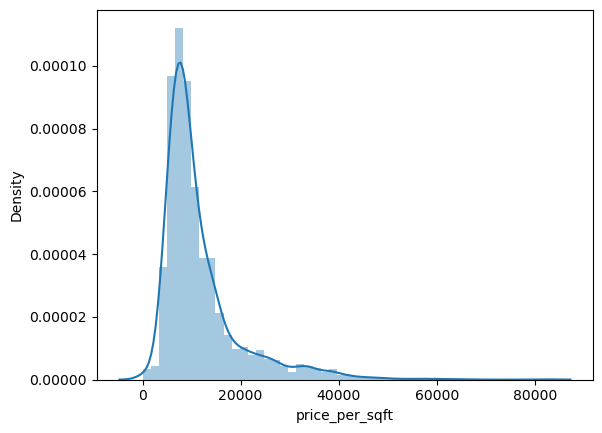

In [19]:
sns.distplot(df['price_per_sqft'])

<Axes: xlabel='price_per_sqft'>

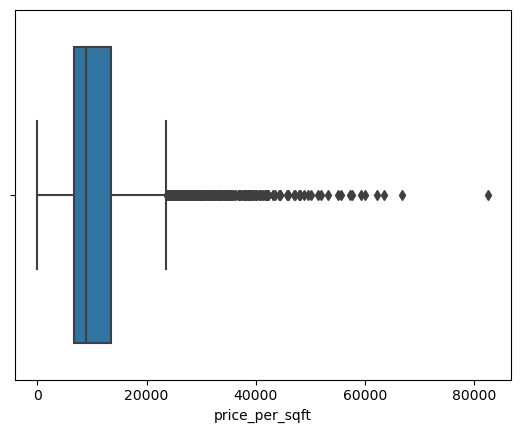

In [20]:
sns.boxplot(x=df['price_per_sqft'])

In [21]:
df[df['price_per_sqft']>50000]

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
163,house,unitech escape,sector 50,10.80,60000.0,1800.0,Plot area 290(242.48 sq.m.)Built Up area: 250 ...,4,4,3,2.0,North,Relatively New,NaN,250.0,200.0,1,1,1,1,0,1,103
348,house,independent,sector 26,14.75,51864.0,2844.0,Plot area 316(264.22 sq.m.),16,20,3+,4.0,East,New Property,NaN,2844.0,NaN,1,1,1,1,0,1,153
392,house,emaar mgf marbella,sector 66,18.00,55556.0,3240.0,Plot area 360(301.01 sq.m.),4,4,3+,3.0,East,Moderately Old,NaN,3240.0,NaN,1,1,0,1,0,2,75
428,house,project housing board colony,sector 31,8.00,63492.0,1260.0,Built Up area: 140 (117.06 sq.m.),2,1,0,1.0,NaN,Undefined,NaN,140.0,NaN,0,0,0,0,0,0,0
727,house,independent,sector 25,16.00,59259.0,2700.0,Plot area 350(292.64 sq.m.)Built Up area: 325 ...,16,16,3+,4.0,West,New Property,NaN,325.0,300.0,1,1,1,1,0,2,72
997,house,nul,sector 28,12.50,51440.0,2430.0,Plot area 270(225.75 sq.m.),16,17,3+,4.0,South,Relatively New,NaN,2430.0,NaN,1,1,0,1,1,2,137
1003,house,cloudnine cottages,sohna road road,5.50,55000.0,1000.0,Plot area 1000(92.9 sq.m.),3,3,0,1.0,NaN,Moderately Old,NaN,1000.0,NaN,0,0,0,0,0,0,0
1124,house,dlf city plots,sector 26,26.00,57206.0,4545.0,Plot area 505(422.24 sq.m.),6,7,3+,2.0,North-East,New Property,NaN,4545.0,NaN,1,1,0,1,1,1,138
1246,flat,unitech vistas,sector 70,9.00,57508.0,1565.0,Built Up area: 1565 (145.39 sq.m.),3,3,0,7.0,NaN,Undefined,NaN,1565.0,NaN,0,0,0,0,0,0,0
1441,house,malibu towne,sector 47,8.50,53125.0,1600.0,Built Up area: 1600 (148.64 sq.m.),12,12,3+,4.0,North,New Property,NaN,1600.0,NaN,0,0,0,0,0,1,99


In [22]:
df = df[df['price_per_sqft'] <= 50000]

<Axes: xlabel='price_per_sqft'>

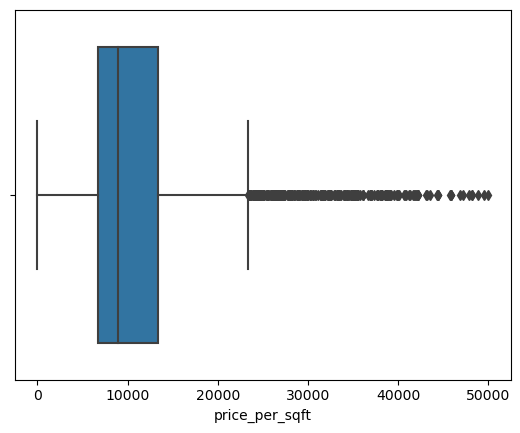

In [23]:
sns.boxplot(x=df['price_per_sqft'])

### Area

C:\Users\vivek matele\AppData\Local\Temp\ipykernel_7780\91062565.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['area'])
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='area', ylabel='Density'>

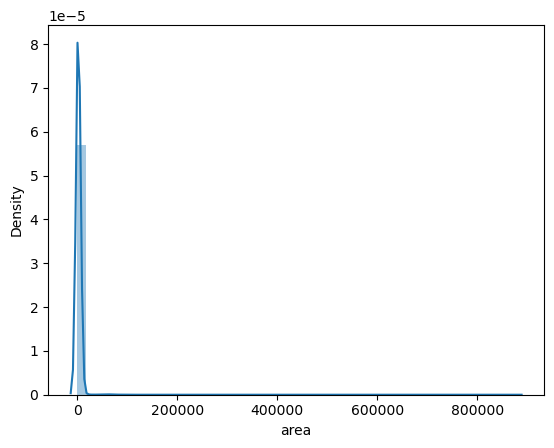

In [24]:
sns.distplot(df['area'])

<Axes: xlabel='area'>

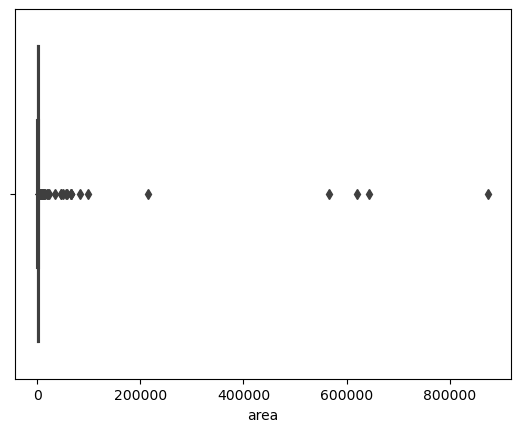

In [25]:
sns.boxplot(x=df['area'])

In [26]:
df['area'].describe()

count      3647.000000
mean       2947.723608
std       23208.194102
min         145.000000
25%        1262.000000
50%        1750.000000
75%        2350.000000
max      875000.000000
Name: area, dtype: float64

In [27]:
df[df['area'] > 100000]

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
248,flat,signature the roselia,sector 95,0.45,7.0,642857.0,Carpet area: 569243 (52884.41 sq.m.),2,2,2,2.0,South-West,New Property,NaN,NaN,569243.0,0,0,0,0,0,0,76
1133,flat,signature global solera 2,sector 107,0.51,9.0,566667.0,Carpet area: 514396 (47788.95 sq.m.),2,2,1,3.0,North,New Property,NaN,NaN,514396.0,0,0,0,0,0,0,44
1244,flat,ramsons kshitij,sector 95,0.31,5.0,620000.0,Carpet area: 607936 (56479.1 sq.m.),2,2,1,1.0,North-East,Relatively New,NaN,NaN,607936.0,1,0,0,0,1,0,65
2657,flat,hcbs sports ville,sohna road,0.35,4.0,875000.0,Built Up area: 737147 (68483.2 sq.m.),2,2,2,8.0,NaN,Relatively New,NaN,737147.0,NaN,0,0,0,0,0,2,44
3437,house,independent,sector 50,5.00,232.0,215517.0,Plot area 2(1011.71 sq.m.),6,5,3+,2.0,NaN,New Property,NaN,2.0,NaN,1,1,0,1,1,1,0


In [28]:
df = df[df['area'] < 100000]

C:\Users\vivek matele\AppData\Local\Temp\ipykernel_7780\91062565.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['area'])
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='area', ylabel='Density'>

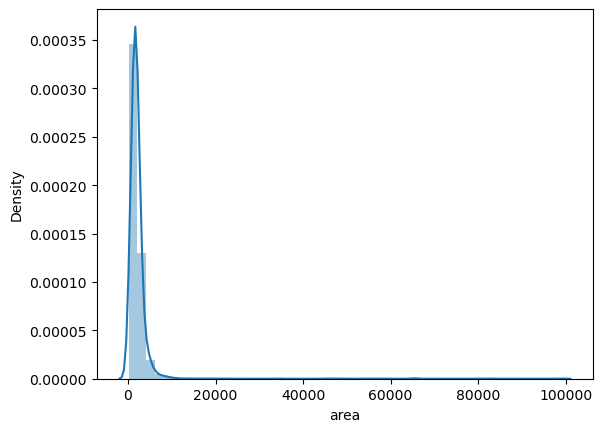

In [29]:
sns.distplot(df['area'])

<Axes: xlabel='area'>

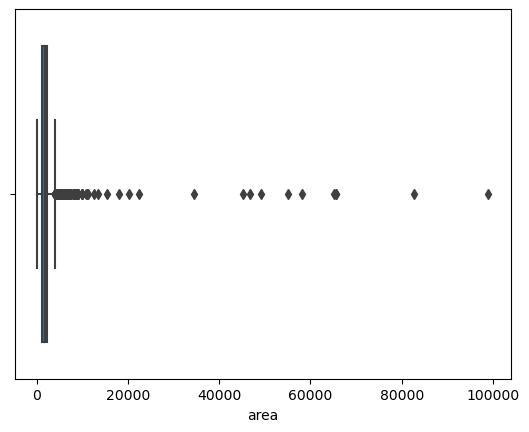

In [30]:
sns.boxplot(x=df['area'])

In [31]:
df[df['area'] > 10000].sort_values('area',ascending=False)[['price','sector','area','areaWithType','bedRoom','bathroom']]

# 1925,2474,2341,1600,1528,3685,3687,939,1493,1593

,price,sector,area,areaWithType,bedRoom,bathroom
1925,18.40,sector 26,98978.0,Plot area 502(419.74 sq.m.)Carpet area: 11000 ...,6,8
2474,1.25,sector 13,82781.0,Plot area 115(7692.86 sq.m.),10,6
2341,0.38,sector 95,65517.0,Carpet area: 64529 (5994.94 sq.m.),2,2
1600,0.38,sector 95,65517.0,Carpet area: 64412 (5984.07 sq.m.),3,2
3484,13.00,sector 28,65261.0,Carpet area: 7250 (6061.92 sq.m.),10,10
1528,0.46,sector 86,58228.0,Carpet area: 58141 (5401.48 sq.m.),2,2
1493,0.33,sector 95,55000.0,Carpet area: 54917 (5101.96 sq.m.),2,2
939,0.28,sohna road,49123.0,Carpet area: 48811 (4534.69 sq.m.),1,1
482,7.30,sector 25,46795.0,Plot area 215(179.77 sq.m.)Built Up area: 5800...,9,9
3685,0.24,sector 95,45283.0,Carpet area: 45966 (4270.38 sq.m.),2,2


In [32]:
df.drop(index=[1925,2474,2341,1600,1528,3685,3687,939,1493,1593], inplace=True)

In [36]:
df[df['sector']=='sector 13']

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
68,house,independent,sector 13,9.00,11111.0,8100.0,Plot area 900(83.61 sq.m.),10,5,3+,4.0,NaN,Old Property,NaN,900.0,NaN,0,0,0,0,0,0,0
1149,house,independent,sector 13,4.50,9091.0,4950.0,Plot area 550(459.87 sq.m.),4,5,2,2.0,East,Old Property,NaN,4950.0,NaN,0,0,0,0,0,0,0
1601,house,independent,sector 13,0.45,4808.0,936.0,Built Up area: 936 (86.96 sq.m.),1,1,0,1.0,NaN,Undefined,NaN,936.0,NaN,0,0,0,0,0,0,0
1978,house,independent,sector 13,1.50,10518.0,1426.0,Plot area 1426(132.48 sq.m.),2,2,2,3.0,South-West,Old Property,NaN,1426.0,NaN,1,0,0,1,0,0,7
2081,house,independent,sector 13,0.90,11464.0,785.0,Plot area 785(72.93 sq.m.),5,4,3,3.0,North-West,Moderately Old,NaN,785.0,NaN,1,1,0,1,1,0,0
2152,house,independent,sector 13,0.62,3588.0,1728.0,Built Up area: 192 (17.84 sq.m.),6,6,0,3.0,NaN,Undefined,NaN,192.0,NaN,0,0,0,0,0,0,0
2498,house,independent,sector 13,2.25,6944.0,3240.0,Carpet area: 360 (301.01 sq.m.),10,10,2,1.0,East,Undefined,NaN,NaN,360.0,0,0,0,0,0,0,0
2858,house,independent,sector 13,0.50,10101.0,495.0,Plot area 55(5.11 sq.m.),12,4,3,4.0,NaN,Old Property,NaN,55.0,NaN,0,0,0,0,0,0,15


In [37]:
df[df['area'] > 10000].sort_values('area',ascending=False)[['sector','price','price_per_sqft','area','areaWithType','carpet_area','built_up_area']]

,sector,price,price_per_sqft,area,areaWithType,carpet_area,built_up_area
3484,sector 28,13.00,1992.0,65261.0,Carpet area: 7250 (6061.92 sq.m.),7250.00,NaN
482,sector 25,7.30,1560.0,46795.0,Plot area 215(179.77 sq.m.)Built Up area: 5800...,5200.00,5800.0
1354,sector 57,6.25,2778.0,22498.0,Plot area 3100(2591.99 sq.m.)Built Up area: 26...,2500.00,2660.0
129,sector 43,5.50,2716.0,20250.0,Plot area 215(179.77 sq.m.)Built Up area: 2850...,2250.00,2850.0
2819,sector 85,2.50,1379.0,18129.0,Carpet area: 18122 (1683.59 sq.m.),18122.00,NaN
1478,sector 50,6.95,4490.0,15479.0,Plot area 240(200.67 sq.m.)Built Up area: 2160...,1720.00,2160.0
3456,sector 88a,1.75,1384.0,12645.0,Carpet area: 1175.11,1175.11,NaN
2997,sector 43,27.50,24366.0,11286.0,Plot area 1254(1048.5 sq.m.),NaN,11286.0
2729,sector 65,13.20,12000.0,11000.0,Carpet area: 11000 (1021.93 sq.m.),11000.00,NaN
954,sohna road road,5.50,5093.0,10799.0,Plot area 1200(1003.35 sq.m.)Built Up area: 35...,NaN,3500.0


In [38]:
df.loc[3484,'area'] =7250
df.loc[482,'area'] =5800
df.loc[1354,'area'] = 2660
df.loc[129,'area'] = 2850
df.loc[1478,'area'] = 2160
df.loc[3456,'area'] = 1175
df.loc[954,'area'] = 3500


In [41]:
df.drop(index=[2819], inplace=True)

C:\Users\vivek matele\AppData\Local\Temp\ipykernel_7780\91062565.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['area'])
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='area', ylabel='Density'>

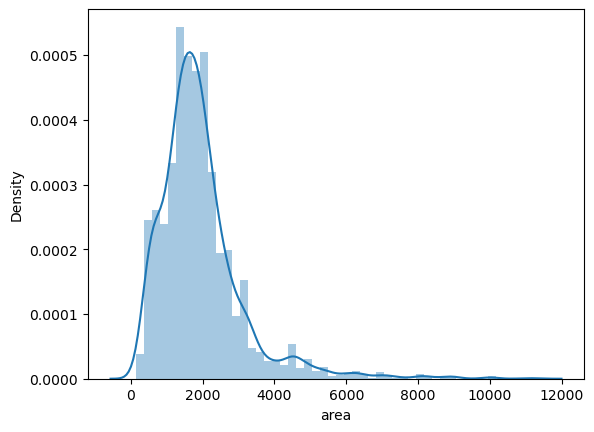

In [42]:
sns.distplot(df['area'])

<Axes: xlabel='area'>

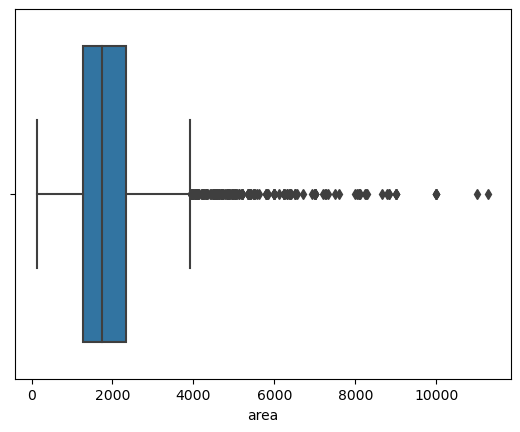

In [43]:
sns.boxplot(x=df['area'])

In [44]:
df['area'].describe()

count     3631.000000
mean      1948.637015
std       1207.316298
min        145.000000
25%       1260.500000
50%       1747.000000
75%       2327.000000
max      11286.000000
Name: area, dtype: float64

### Bedroom

C:\Users\vivek matele\AppData\Local\Temp\ipykernel_7780\1691983684.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['bedRoom'])
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='bedRoom', ylabel='Density'>

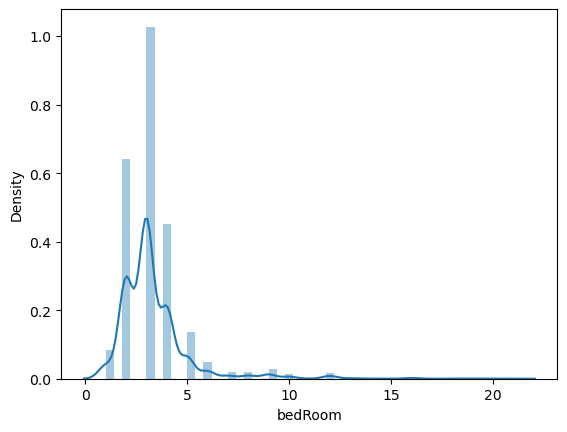

In [45]:
sns.distplot(df['bedRoom'])

<Axes: xlabel='bedRoom'>

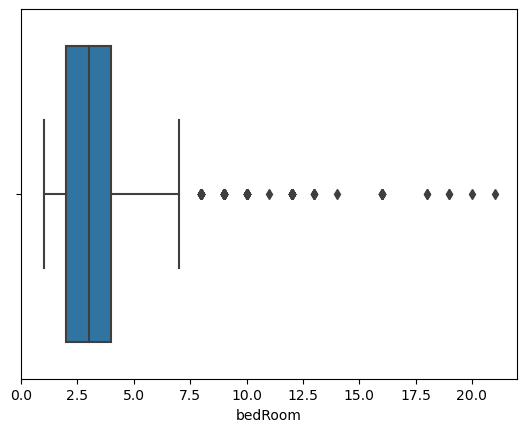

In [46]:
sns.boxplot(x=df['bedRoom'])

In [47]:
df['bedRoom'].describe()

count    3631.000000
mean        3.331589
std         1.827157
min         1.000000
25%         2.000000
50%         3.000000
75%         4.000000
max        21.000000
Name: bedRoom, dtype: float64

In [48]:
df[df['bedRoom'] > 10].sort_values('bedRoom',ascending=False)

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
71,house,independent,sector 54,5.00,43066.0,1161.0,Plot area 129(107.86 sq.m.),21,21,3+,5.0,North,Relatively New,NaN,1161.0,NaN,0,1,0,0,0,2,49
3026,house,independent,sector 43,4.50,39062.0,1152.0,Plot area 128(107.02 sq.m.),20,20,3+,4.0,East,Relatively New,NaN,1152.0,NaN,0,1,0,0,0,2,22
3379,house,independent,sector 17a,3.93,24214.0,1623.0,Plot area 1623(150.78 sq.m.)Built Up area: 162...,19,17,3,4.0,North-West,Relatively New,NaN,1622.0,NaN,1,1,1,1,0,0,74
3412,house,independent,sector 17a,3.87,5160.0,7500.0,Plot area 1623(150.78 sq.m.)Built Up area: 750...,19,17,3+,5.0,North-West,Relatively New,NaN,7500.0,NaN,1,0,1,0,0,0,68
3048,house,private house,sector 55,7.05,46906.0,1503.0,Plot area 167(139.63 sq.m.),18,18,3+,4.0,North-East,Relatively New,NaN,1503.0,NaN,0,0,0,0,1,2,57
3037,house,independent,sector 54,5.50,38194.0,1440.0,Plot area 160(133.78 sq.m.),18,18,3+,4.0,South-West,Relatively New,NaN,1440.0,NaN,0,1,0,0,0,2,70
1544,house,luxury dlf city floors,sector 26,20.00,48888.0,4091.0,Plot area 500(418.06 sq.m.),16,16,3+,4.0,NaN,New Property,NaN,500.0,NaN,0,1,0,0,0,1,31
3219,house,independent,sector 55,9.19,34037.0,2700.0,Plot area 300(250.84 sq.m.),16,18,2,4.0,West,New Property,NaN,2700.0,NaN,0,1,0,1,0,1,49
3248,house,dlf city plots,sector 26,20.00,44267.0,4518.0,Plot area 502(419.74 sq.m.),16,20,3+,4.0,North-East,New Property,NaN,4518.0,NaN,1,1,1,1,0,1,153
1931,house,independent,sector 40,12.00,38986.0,3078.0,Plot area 342(285.96 sq.m.),16,16,3+,4.0,NaN,New Property,NaN,3078.0,NaN,1,1,1,1,0,1,0


In [49]:
df = df[df['bedRoom'] <= 10]

In [50]:
df.shape

(3586, 23)

C:\Users\vivek matele\AppData\Local\Temp\ipykernel_7780\1691983684.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['bedRoom'])
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='bedRoom', ylabel='Density'>

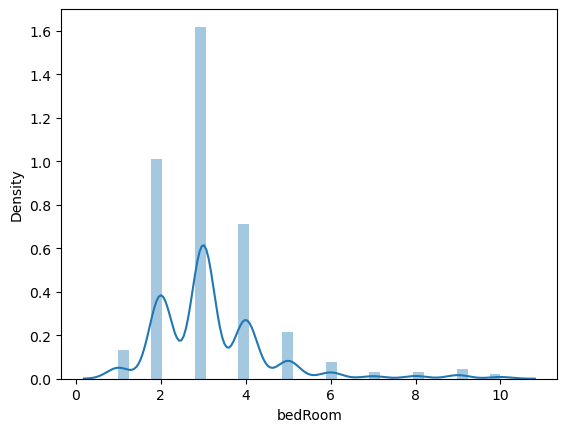

In [51]:
sns.distplot(df['bedRoom'])

<Axes: xlabel='bedRoom'>

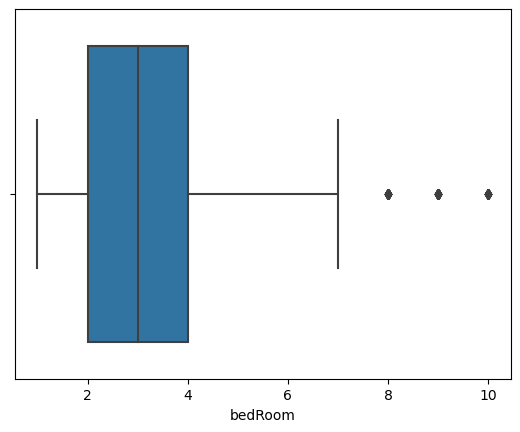

In [52]:
sns.boxplot(x=df['bedRoom'])

In [53]:
df['bedRoom'].describe()

count    3586.000000
mean        3.201617
std         1.389664
min         1.000000
25%         2.000000
50%         3.000000
75%         4.000000
max        10.000000
Name: bedRoom, dtype: float64

### Bathroom

C:\Users\vivek matele\AppData\Local\Temp\ipykernel_7780\2904465235.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['bathroom'])
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='bathroom', ylabel='Density'>

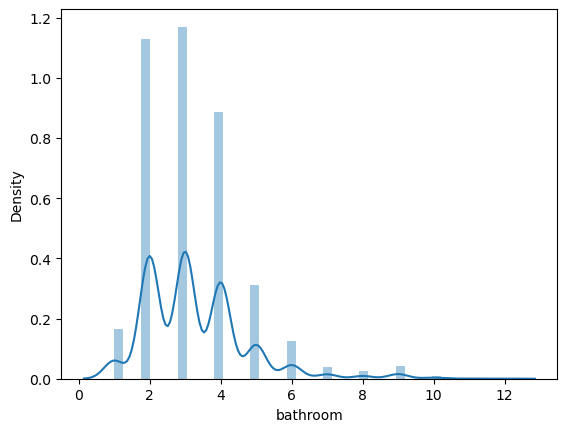

In [54]:
sns.distplot(df['bathroom'])

<Axes: xlabel='bathroom'>

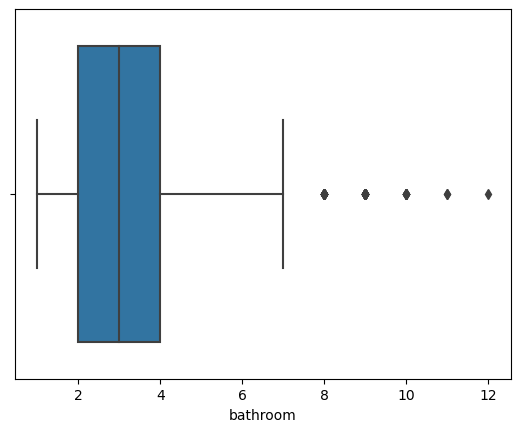

In [55]:
sns.boxplot(x=df['bathroom'])

In [56]:
df[df['bathroom'] > 10].sort_values('bathroom',ascending=False)

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
3725,house,adani brahma samsara,sector 60,18.02,28200.0,6390.0,Built Up area: 6390 (593.65 sq.m.),9,12,3+,3.0,North-East,Relatively New,NaN,6390.0,NaN,0,1,0,0,0,1,146
1924,house,independent,sector 39,7.00,10000.0,7000.0,Plot area 350(32.52 sq.m.)Built Up area: 7000 ...,10,11,3+,4.0,South-East,Relatively New,NaN,7000.0,NaN,0,0,0,1,0,2,38
2487,house,independent,sector 24,11.00,28902.0,3806.0,Plot area 3806.45(353.63 sq.m.)Built Up area: ...,8,11,3+,3.0,East,Old Property,NaN,5000.0,NaN,1,1,0,1,1,1,39


In [57]:
df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,flat,gls avenue 51,sector 92,0.45,6000.0,750.0,Carpet area: 750 (69.68 sq.m.),3,3,1,10.0,North-East,Relatively New,NaN,NaN,750.0,0,0,0,0,0,0,0
1,flat,godrej,sector 79,2.01,8495.0,2366.0,Super Built up area 2366(219.81 sq.m.),3,4,3+,6.0,East,Relatively New,2366.0,NaN,NaN,0,1,0,0,0,0,158
2,flat,pioneer urban presidia,sector 62,7.15,16486.0,4337.0,Super Built up area 4337(402.92 sq.m.),4,5,3+,7.0,East,Relatively New,4337.0,NaN,NaN,1,1,1,0,0,1,158
3,flat,godrej aria,sector 79,1.10,7772.0,1415.0,Super Built up area 1351(125.51 sq.m.),2,2,3+,4.0,North-East,New Property,1351.0,NaN,NaN,0,0,0,0,0,1,49
4,flat,emaar digihomes,sector 62,2.15,14257.0,1508.0,Carpet area: 1508 (140.1 sq.m.),2,2,3,31.0,NaN,Under Construction,NaN,NaN,1508.0,0,0,0,0,0,0,101


### super built up area

C:\Users\vivek matele\AppData\Local\Temp\ipykernel_7780\4184943455.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['super_built_up_area'])
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='super_built_up_area', ylabel='Density'>

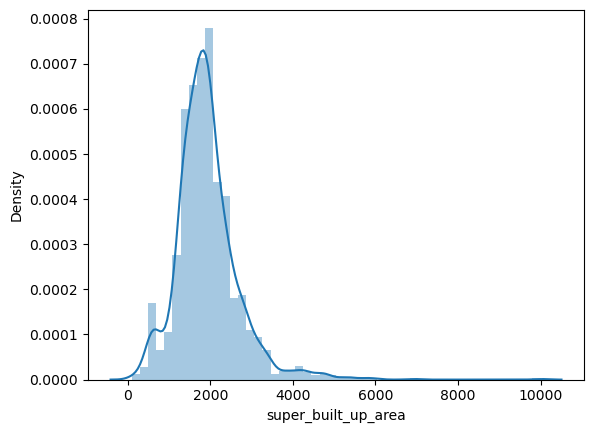

In [58]:
sns.distplot(df['super_built_up_area'])

<Axes: xlabel='super_built_up_area'>

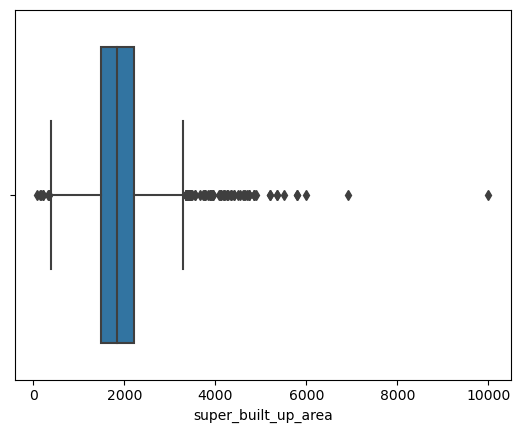

In [59]:
sns.boxplot(x=df['super_built_up_area'])

In [60]:
df['super_built_up_area'].describe()

count     1875.000000
mean      1925.237627
std        764.172177
min         89.000000
25%       1479.500000
50%       1828.000000
75%       2215.000000
max      10000.000000
Name: super_built_up_area, dtype: float64

In [61]:
df[df['super_built_up_area'] > 6000]

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
5,flat,bestech park view grand spa,sector 81,4.7,6786.0,6926.0,Super Built up area 6926(643.45 sq.m.),4,4,3+,19.0,North,Relatively New,6926.0,NaN,NaN,0,1,0,0,0,1,140
3737,flat,krrish provence estate,gwal pahari,7.5,7500.0,10000.0,Super Built up area 10000(929.03 sq.m.),5,6,3+,23.0,North-East,Relatively New,10000.0,NaN,NaN,0,1,0,1,1,0,49


### built up area

C:\Users\vivek matele\AppData\Local\Temp\ipykernel_7780\3494228458.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['built_up_area'])
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='built_up_area', ylabel='Density'>

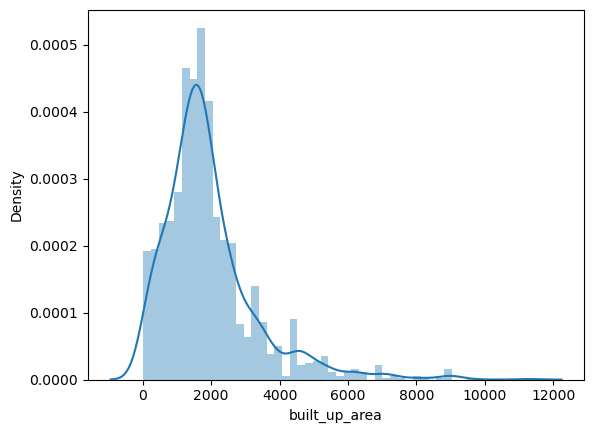

In [62]:
sns.distplot(df['built_up_area'])

<Axes: xlabel='built_up_area'>

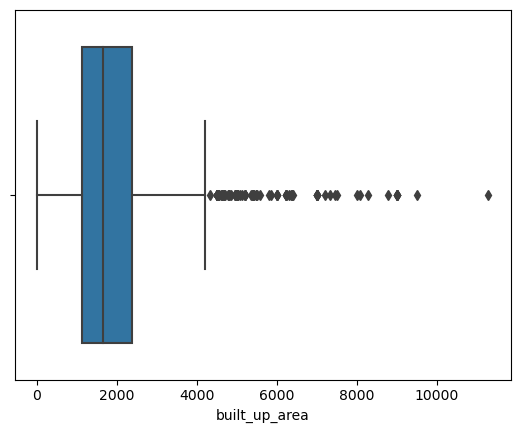

In [63]:
sns.boxplot(x=df['built_up_area'])

In [64]:
df[df['built_up_area'] > 10000]

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
2997,house,independent,sector 43,27.5,24366.0,11286.0,Plot area 1254(1048.5 sq.m.),6,7,3+,3.0,North-East,Relatively New,NaN,11286.0,NaN,1,1,0,1,1,1,42


### carpet area

C:\Users\vivek matele\AppData\Local\Temp\ipykernel_7780\3905767603.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['carpet_area'])
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='carpet_area', ylabel='Density'>

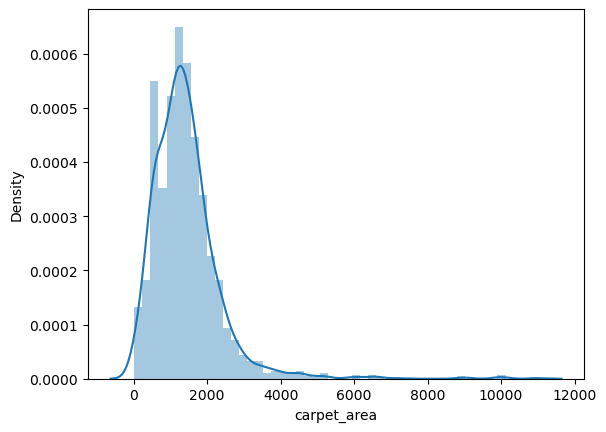

In [65]:
sns.distplot(df['carpet_area'])

<Axes: xlabel='carpet_area'>

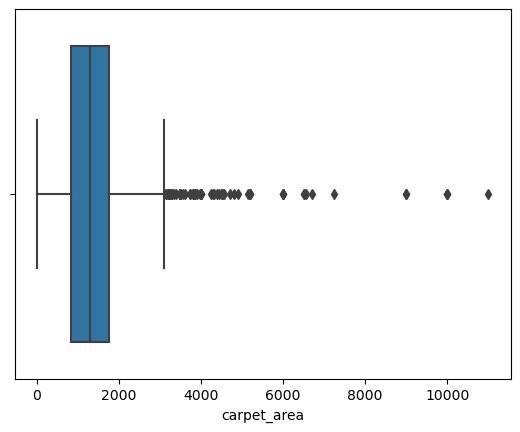

In [66]:
sns.boxplot(x=df['carpet_area'])

In [67]:
df[df['carpet_area'] > 10000]

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
2729,flat,m3m golfestate,sector 65,13.2,12000.0,11000.0,Carpet area: 11000 (1021.93 sq.m.),4,4,3,13.0,North,Moderately Old,NaN,NaN,11000.0,0,1,0,0,0,0,60


In [68]:
df[df['carpet_area'] > 10000]

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
2729,flat,m3m golfestate,sector 65,13.2,12000.0,11000.0,Carpet area: 11000 (1021.93 sq.m.),4,4,3,13.0,North,Moderately Old,NaN,NaN,11000.0,0,1,0,0,0,0,60


In [69]:
df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,flat,gls avenue 51,sector 92,0.45,6000.0,750.0,Carpet area: 750 (69.68 sq.m.),3,3,1,10.0,North-East,Relatively New,NaN,NaN,750.0,0,0,0,0,0,0,0
1,flat,godrej,sector 79,2.01,8495.0,2366.0,Super Built up area 2366(219.81 sq.m.),3,4,3+,6.0,East,Relatively New,2366.0,NaN,NaN,0,1,0,0,0,0,158
2,flat,pioneer urban presidia,sector 62,7.15,16486.0,4337.0,Super Built up area 4337(402.92 sq.m.),4,5,3+,7.0,East,Relatively New,4337.0,NaN,NaN,1,1,1,0,0,1,158
3,flat,godrej aria,sector 79,1.10,7772.0,1415.0,Super Built up area 1351(125.51 sq.m.),2,2,3+,4.0,North-East,New Property,1351.0,NaN,NaN,0,0,0,0,0,1,49
4,flat,emaar digihomes,sector 62,2.15,14257.0,1508.0,Carpet area: 1508 (140.1 sq.m.),2,2,3,31.0,NaN,Under Construction,NaN,NaN,1508.0,0,0,0,0,0,0,101


C:\Users\vivek matele\AppData\Local\Temp\ipykernel_7780\3385064764.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['luxury_score'])
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='luxury_score', ylabel='Density'>

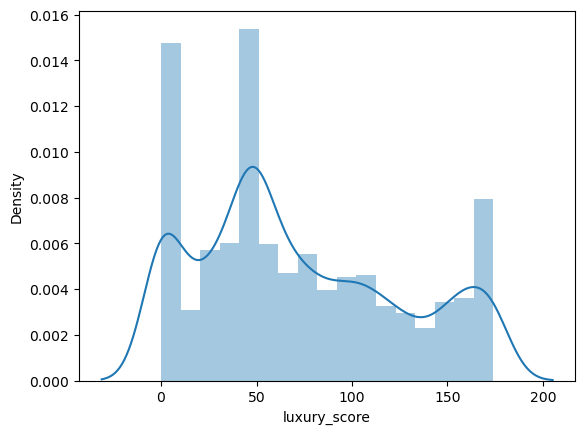

In [70]:
sns.distplot(df['luxury_score'])

<Axes: >

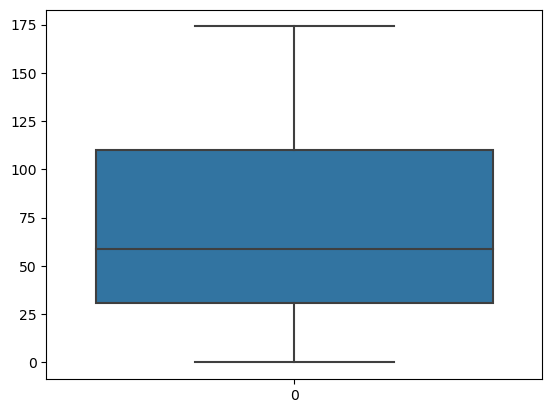

In [71]:
sns.boxplot(df['luxury_score'])

In [75]:
df.shape

(3586, 23)

In [76]:
df['price_per_sqft'] = round((df['price']*10000000)/df['area'])

In [87]:
df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,flat,gls avenue 51,sector 92,0.45,6000.0,750.0,Carpet area: 750 (69.68 sq.m.),3,3,1,10.0,North-East,Relatively New,NaN,NaN,750.0,0,0,0,0,0,0,0
1,flat,godrej,sector 79,2.01,8495.0,2366.0,Super Built up area 2366(219.81 sq.m.),3,4,3+,6.0,East,Relatively New,2366.0,NaN,NaN,0,1,0,0,0,0,158
2,flat,pioneer urban presidia,sector 62,7.15,16486.0,4337.0,Super Built up area 4337(402.92 sq.m.),4,5,3+,7.0,East,Relatively New,4337.0,NaN,NaN,1,1,1,0,0,1,158
3,flat,godrej aria,sector 79,1.10,7774.0,1415.0,Super Built up area 1351(125.51 sq.m.),2,2,3+,4.0,North-East,New Property,1351.0,NaN,NaN,0,0,0,0,0,1,49
4,flat,emaar digihomes,sector 62,2.15,14257.0,1508.0,Carpet area: 1508 (140.1 sq.m.),2,2,3,31.0,NaN,Under Construction,NaN,NaN,1508.0,0,0,0,0,0,0,101


C:\Users\vivek matele\AppData\Local\Temp\ipykernel_7780\2186227091.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['price_per_sqft'])
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='price_per_sqft', ylabel='Density'>

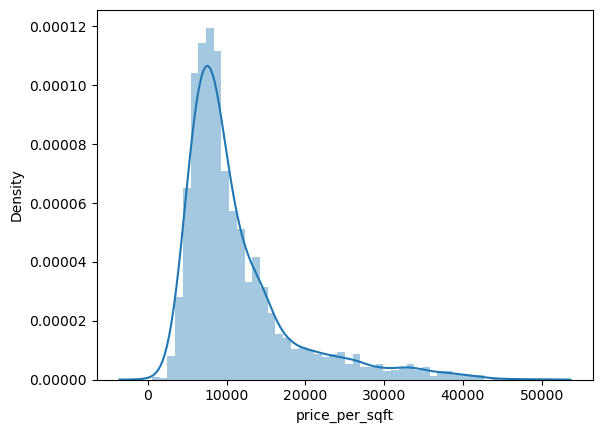

In [78]:
sns.distplot(df['price_per_sqft'])

<Axes: >

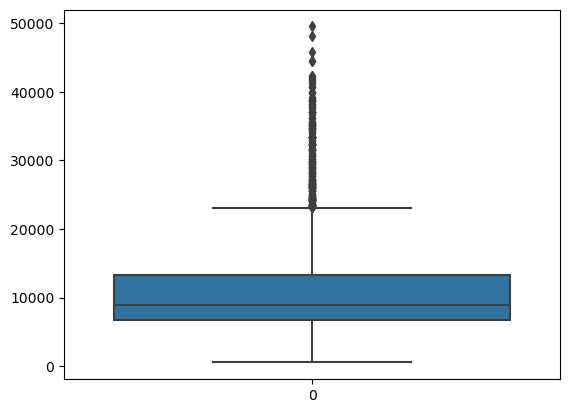

In [79]:
sns.boxplot(df['price_per_sqft'])

In [80]:
df[df['price_per_sqft'] > 42000]

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
10,house,independent,sector 26,20.0,44444.0,4500.0,Plot area 500(418.06 sq.m.),5,7,3+,3.0,West,Relatively New,NaN,4500.0,NaN,0,1,0,1,0,2,97
973,house,independent,sector 43,9.5,42222.0,2250.0,Plot area 302(252.51 sq.m.)Built Up area: 300 ...,5,5,3+,2.0,North-East,Relatively New,NaN,300.0,250.0,0,1,0,1,0,1,88
1175,house,independent,sector 25,13.0,45710.0,2844.0,Plot area 316(264.22 sq.m.),6,8,3+,NaN,NaN,Relatively New,NaN,2844.0,NaN,1,1,1,1,0,2,0
1966,house,independent,sector 26,19.0,42222.0,4500.0,Plot area 500(418.06 sq.m.),6,8,3+,3.0,East,Moderately Old,NaN,4500.0,NaN,1,1,1,1,0,1,103
2195,house,independent,sector 105,9.9,49500.0,2000.0,Built Up area: 2000 (185.81 sq.m.)Carpet area:...,2,2,2,3.0,North,Undefined,NaN,2000.0,1800.0,0,0,0,0,0,0,0
2488,house,independent,sector 28,12.0,42194.0,2844.0,Plot area 316(264.22 sq.m.),4,5,3+,4.0,East,Relatively New,NaN,2844.0,NaN,0,1,1,1,0,1,60
2746,house,dlf city plots,sector 26,19.0,42054.0,4518.0,Plot area 502(419.74 sq.m.),6,6,3,2.0,East,Relatively New,NaN,4518.0,NaN,1,1,0,0,0,1,121
2803,house,sushant lok 1 builder floors,sector 43,13.0,48148.0,2700.0,Plot area 300(250.84 sq.m.),3,3,3+,4.0,North,New Property,NaN,2700.0,NaN,0,0,0,1,0,1,7
3001,house,independent,sector 55,5.0,44444.0,1125.0,Plot area 125(104.52 sq.m.)Built Up area: 115 ...,9,9,3+,5.0,East,New Property,NaN,115.0,100.0,0,0,0,0,1,1,44


In [85]:
x = df[df['price_per_sqft'] <= 20000]
(x['area']/x['bedRoom']).quantile(0.05)

252.20000000000005

In [88]:
df[(df['area']/df['bedRoom'])<252]

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,flat,gls avenue 51,sector 92,0.45,6000.0,750.0,Carpet area: 750 (69.68 sq.m.),3,3,1,10.0,North-East,Relatively New,NaN,NaN,750.000000,0,0,0,0,0,0,0
15,house,independent,sector 4,1.10,6111.0,1800.0,Plot area 200(167.23 sq.m.),8,4,3+,2.0,West,Old Property,NaN,1800.0,NaN,0,0,0,0,0,0,7
44,flat,mvn athens,sohna road,0.26,5394.0,482.0,Carpet area: 481.74 (44.76 sq.m.),2,2,1,2.0,NaN,Relatively New,NaN,NaN,481.792164,0,0,0,0,0,0,37
56,flat,pyramid urban homes 2,sector 86,0.41,8283.0,495.0,Carpet area: 501 (46.54 sq.m.),2,2,1,7.0,West,New Property,NaN,NaN,501.000000,1,1,0,1,1,0,49
69,house,independent,sector 4,0.50,10482.0,477.0,Built Up area: 53 (44.31 sq.m.),5,3,0,1.0,NaN,Undefined,NaN,53.0,NaN,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3723,flat,zara aavaas,sector 104,0.49,6577.0,745.0,Super Built up area 745(69.21 sq.m.)Carpet are...,3,2,2,7.0,NaN,Under Construction,745.0,NaN,645.000000,0,0,0,0,0,0,74
3726,flat,supertech basera,sector 79,0.36,7643.0,471.0,Built Up area: 546 (50.73 sq.m.)Carpet area: 4...,2,2,1,4.0,NaN,New Property,NaN,546.0,471.000000,0,0,0,0,0,0,60
3731,flat,pyramid urban homes 2,sector 86,0.42,8485.0,495.0,Carpet area: 501 (46.54 sq.m.),2,2,1,2.0,North-East,New Property,NaN,NaN,501.000000,1,1,0,1,1,0,84
3739,house,independent,sector 6,0.75,10519.0,713.0,Plot area 713(66.24 sq.m.),6,4,1,3.0,NaN,Moderately Old,NaN,713.0,NaN,0,0,0,0,0,0,62


C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


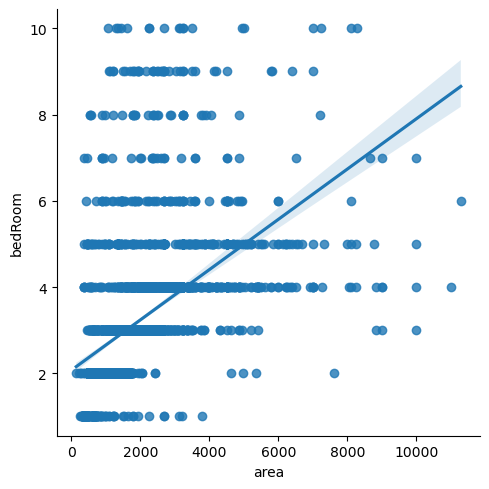

In [89]:
sns.lmplot(data=df,x='area',y='bedRoom')

In [90]:
df['area_room_ratio']=df['area']/df['bedRoom']

In [91]:
df

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score,area_room_ratio
0,flat,gls avenue 51,sector 92,0.45,6000.0,750.0,Carpet area: 750 (69.68 sq.m.),3,3,1,10.0,North-East,Relatively New,NaN,NaN,750.0,0,0,0,0,0,0,0,250.000000
1,flat,godrej,sector 79,2.01,8495.0,2366.0,Super Built up area 2366(219.81 sq.m.),3,4,3+,6.0,East,Relatively New,2366.0,NaN,NaN,0,1,0,0,0,0,158,788.666667
2,flat,pioneer urban presidia,sector 62,7.15,16486.0,4337.0,Super Built up area 4337(402.92 sq.m.),4,5,3+,7.0,East,Relatively New,4337.0,NaN,NaN,1,1,1,0,0,1,158,1084.250000
3,flat,godrej aria,sector 79,1.10,7774.0,1415.0,Super Built up area 1351(125.51 sq.m.),2,2,3+,4.0,North-East,New Property,1351.0,NaN,NaN,0,0,0,0,0,1,49,707.500000
4,flat,emaar digihomes,sector 62,2.15,14257.0,1508.0,Carpet area: 1508 (140.1 sq.m.),2,2,3,31.0,NaN,Under Construction,NaN,NaN,1508.0,0,0,0,0,0,0,101,754.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3798,flat,godrej aria,sector 79,1.70,7427.0,2289.0,Super Built up area 2289(212.66 sq.m.)Carpet a...,3,4,3+,6.0,East,New Property,2289.0,NaN,1121.0,0,1,0,0,0,0,81,763.000000
3799,flat,ats triumph,sector 104,4.45,6846.0,6500.0,Carpet area: 6500 (603.87 sq.m.),4,5,3+,27.0,North,Relatively New,NaN,NaN,6500.0,0,0,0,0,0,0,110,1625.000000
3800,house,independent,sector 56,8.00,9654.0,8287.0,Plot area 362(33.63 sq.m.)Built Up area: 8286 ...,10,10,3+,4.0,NaN,Relatively New,NaN,8286.0,NaN,1,1,0,1,0,2,107,828.700000
3801,flat,silverglades the melia,sohna road,1.01,6999.0,1443.0,Super Built up area 1450(134.71 sq.m.)Carpet a...,2,2,3,12.0,NaN,Under Construction,1450.0,NaN,950.0,1,0,0,0,0,0,80,721.500000


In [94]:
df[(df['area']/df['bedRoom'])<252]['bedRoom'].value_counts()

bedRoom
2     53
3     38
5     28
6     17
4     17
9     15
8     12
7      8
10     7
1      1
Name: count, dtype: int64

In [99]:
df=df[df['area_room_ratio']>100]

In [101]:
outliers_df=df[(df['area_room_ratio']<250) & (df['bedRoom']>3)]

In [102]:
outliers_df['bedRoom']=round(outliers_df['bedRoom']/outliers_df['floorNum'])

C:\Users\vivek matele\AppData\Local\Temp\ipykernel_7780\3359844150.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outliers_df['bedRoom']=round(outliers_df['bedRoom']/outliers_df['floorNum'])


In [103]:
df.update(outliers_df)

C:\Users\vivek matele\AppData\Local\Temp\ipykernel_7780\3159295313.py:1: FutureWarning: Downcasting behavior in Series and DataFrame methods 'where', 'mask', and 'clip' is deprecated. In a future version this will not infer object dtypes or cast all-round floats to integers. Instead call result.infer_objects(copy=False) for object inference, or cast round floats explicitly. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.update(outliers_df)
C:\Users\vivek matele\AppData\Local\Temp\ipykernel_7780\3159295313.py:1: FutureWarning: Downcasting behavior in Series and DataFrame methods 'where', 'mask', and 'clip' is deprecated. In a future version this will not infer object dtypes or cast all-round floats to integers. Instead call result.infer_objects(copy=False) for object inference, or cast round floats explicitly. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.update(outliers_df)
C:\Users\viv

In [104]:
df['area_room_ratio']=df['area']/df['bedRoom']

C:\Users\vivek matele\AppData\Local\Temp\ipykernel_7780\2419531321.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['area_room_ratio']=df['area']/df['bedRoom']


In [105]:
df[(df['area_room_ratio']<250) & (df['bedRoom']>4)]

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score,area_room_ratio
258,house,independent,sector 11,3.50,15556.0,2250.0,Built Up area: 2250 (209.03 sq.m.),10,1,0,1.0,NaN,New Property,NaN,2250.0,NaN,0,0,0,0,0,0,0,225.000000
586,house,independent,sector 7,1.16,11717.0,990.0,Carpet area: 110 (91.97 sq.m.),5,4,2,1.0,North-East,Undefined,NaN,NaN,110.0,0,0,0,0,0,0,0,198.000000
2077,house,independent,sector 2,0.98,9074.0,1080.0,Carpet area: 120 (100.34 sq.m.),9,4,3,1.0,South,Undefined,NaN,NaN,120.0,0,0,0,0,0,0,0,120.000000
2178,house,independent,sector 17,0.32,5664.0,565.0,Built Up area: 565 (52.49 sq.m.),5,1,0,1.0,NaN,Undefined,NaN,565.0,NaN,0,0,0,0,0,0,0,113.000000
2328,house,independent,sector 12,2.50,13889.0,1800.0,Plot area 1800(167.23 sq.m.),9,5,2,1.0,South-East,Old Property,NaN,1800.0,NaN,0,0,0,1,0,0,8,200.000000
2583,house,independent,sector 12,0.65,6500.0,1000.0,Carpet area: 1000 (92.9 sq.m.),6,2,3,1.0,NaN,Undefined,NaN,NaN,1000.0,0,0,0,0,0,0,0,166.666667
2679,house,shivpuri,sector 7,2.80,12444.0,2250.0,Plot area 2250(209.03 sq.m.),10,7,3,1.0,NaN,Old Property,NaN,2250.0,NaN,1,1,0,1,1,1,0,225.000000
2702,house,independent,sector 3 phase 2,1.10,10000.0,1100.0,Built Up area: 1100 (102.19 sq.m.)Carpet area:...,5,4,2,1.0,East,Undefined,NaN,1100.0,900.0,0,0,0,0,0,0,0,220.000000
2717,house,independent,sector 105,1.10,12222.0,900.0,Carpet area: 900 (83.61 sq.m.),6,4,1,1.0,South-West,Undefined,NaN,NaN,900.0,0,0,0,0,0,0,0,150.000000
2815,house,"bhim nagar, sector 6",sector 6,0.85,14096.0,603.0,Plot area 67(6.22 sq.m.),5,2,2,1.0,NaN,Old Property,NaN,67.0,NaN,0,0,0,1,0,0,29,120.600000


In [107]:
df[(df['area_room_ratio']<250) & (df['bedRoom']>4)].shape

(13, 24)

In [109]:
df=df[~((df['area_room_ratio']<250) & (df['bedRoom']>3))]

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


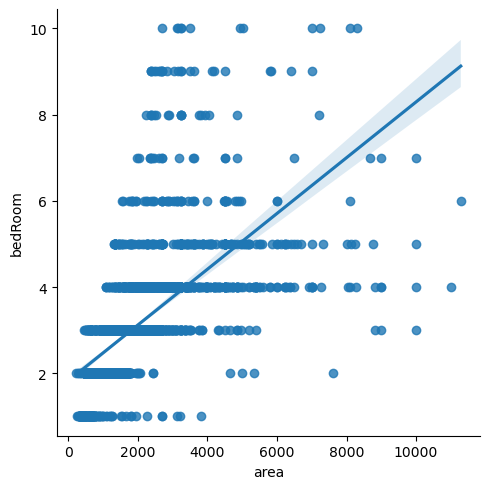

In [110]:
sns.lmplot(data=df,x='area',y='bedRoom')

In [111]:
df.shape

(3549, 24)

In [112]:
df.to_csv('gurgaon_properties_outlier_treated_1.csv',index=False)